In [3]:
#Python 3.5.2 |Anaconda 4.2.0 (64-bit)
from sklearn import datasets, metrics
from sklearn import metrics
import tensorflow as tf
import numpy as np
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [4]:
# Our data set of iris flowers
iris = datasets.load_iris()

# Load datasets and split them for training and testing
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)


In [5]:
####### TENSORFLOW #######
# Here is tensorflow's syntax for defining features.
# We must specify that all features have real-value data

feature_columns = [tf.contrib.layers.real_valued_column("",dimension=4)]
# notice the dimension is set to four because we have four columns
# We set our "learning rate" which is a decimal that tells the network
# how quickly to learn

optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1)
# A learning rate closer to 0 means the network will learn slower
# Build a linear classifier (logistic regression)
# note we have to tell tensorflow the number of classes we are looking for
# which are 3 classes of iris
classifier = tf.contrib.learn.LinearClassifier(feature_columns=feature_columns,\
                                               optimizer=optimizer, n_classes=3)

# Fit model. Uses error optimization techniques like stochastic gradient descent
classifier.fit(x=X_train, y=y_train, steps=1000) # number of iterations

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'keep_checkpoint_every_n_hours': 10000, 'keep_checkpoint_max': 5, '_master': '', '_task_type': None, 'save_summary_steps': 100, '_num_ps_replicas': 0, '_is_chief': True, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', 'save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D5B3902EF0>, '_environment': 'local', '_task_id': 0, 'save_checkpoints_secs': 600, 'tf_random_seed': None}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and b

In [6]:
# Evaluate accuracy.
accuracy_score = classifier.evaluate(x=X_test, y=y_test)["accuracy"]
print('Accuracy: {0:f}'.format(accuracy_score))
# Accuracy: 0.973684

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restored model from C:\Users\Derek\AppData\Local\Temp\tmps5u242pe
INFO:t

In [7]:
# Classify two new flower samples.
new_samples = np.array([[6.4, 3.2, 4.5, 1.5], [5.8, 3.1, 5.0, 1.7]], dtype=float)
y = classifier.predict(new_samples)

print('Predictions: {}'.format(str(y)))
#Predictions: [1 2]

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Predictions: <generator object _as_iterable at 0x000001D5B3882BA0>


In [8]:
from sklearn.linear_model import LogisticRegression
# compare our result above to a simple scikit-learn logistic regression

logreg = LogisticRegression()
# instantiate the model

logreg.fit(X_train, y_train)
# fit it to our training set

y_predicted = logreg.predict(X_test)
# predict on our test set, to avoid overfitting!

accuracy = metrics.accuracy_score(y_predicted, y_test)
# get our accuracy score

print (accuracy)
# It's the same thing!

0.921052631579


In [9]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1)

classifier = tf.contrib.learn.LinearClassifier(feature_columns=feature_columns,\
                                               optimizer=optimizer, n_classes=3)

classifier.fit(x=X_train, y=y_train, steps=2000) # number of iterations is 2000 now

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'keep_checkpoint_every_n_hours': 10000, 'keep_checkpoint_max': 5, '_master': '', '_task_type': None, 'save_summary_steps': 100, '_num_ps_replicas': 0, '_is_chief': True, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', 'save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D5A0816F98>, '_environment': 'local', '_task_id': 0, 'save_checkpoints_secs': 600, 'tf_random_seed': None}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and b

In [10]:
# Evaluate accuracy.
accuracy_score = classifier.evaluate(x=X_test, y=y_test)["accuracy"]
print('Accuracy: {0:f}'.format(accuracy_score))
# Accuracy: 0.973684

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restored model from C:\Users\Derek\AppData\Local\Temp\tmpnvoswjdc
INFO:t

In [11]:
# Specify that all features have real-value data
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1)
# Build 3 layer DNN with 10, 20, 10 units respectively.

classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,\
                                            hidden_units=[10, 20, 10], optimizer=optimizer,\
                                            n_classes=3)
# Fit model.
classifier.fit(x=X_train, y=y_train, steps=2000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'keep_checkpoint_every_n_hours': 10000, 'keep_checkpoint_max': 5, '_master': '', '_task_type': None, 'save_summary_steps': 100, '_num_ps_replicas': 0, '_is_chief': True, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', 'save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D5AA48DF98>, '_environment': 'local', '_task_id': 0, 'save_checkpoints_secs': 600, 'tf_random_seed': None}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and b

In [12]:
tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[10, 20, 10],\
                               optimizer=optimizer, n_classes=3)

# Evaluate accuracy.
accuracy_score = classifier.evaluate(x=X_test, y=y_test)["accuracy"]

print('Accuracy: {0:f}'.format(accuracy_score))
#Accuracy: 0.973684 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'keep_checkpoint_every_n_hours': 10000, 'keep_checkpoint_max': 5, '_master': '', '_task_type': None, 'save_summary_steps': 100, '_num_ps_replicas': 0, '_is_chief': True, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', 'save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D5AA48D780>, '_environment': 'local', '_task_id': 0, 'save_checkpoints_secs': 600, 'tf_random_seed': None}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and b

In [13]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

MNIST_data/
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [14]:
x_mnist = mnist.train.images
y_mnist = mnist.train.labels.astype(int)

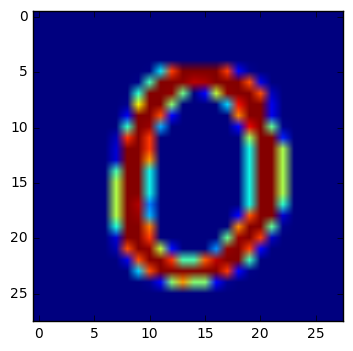

In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_mnist[10].reshape(28, 28))

In [16]:
y_mnist[10]

0

In [17]:
x_mnist.shape
#(55000, 784)

y_mnist.shape
#(55000,)

(55000,)

In [18]:
# Specify that all features have real-value data
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=784)]
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.1)

# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,\
                                            hidden_units=[10, 20, 10], optimizer=optimizer, n_classes=10)

# Fit model.
classifier.fit(x=x_mnist, y=y_mnist, steps=1000)
# Warning this is veryyyyyyyy slow

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'keep_checkpoint_every_n_hours': 10000, 'keep_checkpoint_max': 5, '_master': '', '_task_type': None, 'save_summary_steps': 100, '_num_ps_replicas': 0, '_is_chief': True, 'tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', 'save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001D5AA48D0B8>, '_environment': 'local', '_task_id': 0, 'save_checkpoints_secs': 600, 'tf_random_seed': None}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and b

In [19]:
x_mnist_test = mnist.test.images
y_mnist_test = mnist.test.labels.astype(int)

x_mnist_test.shape
# (10000, 784)
y_mnist_test.shape
# (10000,)

(10000,)

In [21]:
# Evaluate accuracy.
accuracy_score = classifier.evaluate(x=x_mnist_test, y=y_mnist_test)["accuracy"]
print('Accuracy: {0:f}'.format(accuracy_score))
#Accuracy: 0.906600

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Summary name dnn/hiddenlayer_0:fraction_of_zero_values is illegal; using

In [23]:
# Not bad, 92% accuracy on our dataset. Let's take a second and compare
# this performance to a standard sklearn logistic regression now:
logreg = LogisticRegression()
logreg.fit(x_mnist, y_mnist)
# Warning this is slow

y_predicted = logreg.predict(x_mnist_test)
from sklearn.metrics import accuracy_score
# predict on our test set, to avoid overfitting!

accuracy = accuracy_score(y_predicted, y_mnist_test)
# get our accuracy score
accuracy
# 0.91979

0.91979999999999995